In [1]:
import pandas as pd
import pathlib
#check the location of the CSV file. I used a data subdirectory, followed by Netflix' directory structure.
path = pathlib.Path.cwd() / 'data/CONTENT_INTERACTION/ViewingActivity.csv'
df = pd.read_csv(path)
df.shape

(13620, 10)

In [ ]:
df.head(1)

In [2]:
#dropping some columns
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2021-10-01 19:10:03,00:49:09,Penguins of Madagascar: The Movie


In [ ]:
df.dtypes

In [3]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [ ]:
#Set this to your local TimeZone if desired
import pytz
pytz.all_timezones

In [4]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('Pacific/Auckland')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2021-10-02 08:10:03+13:00,00:49:09,Penguins of Madagascar: The Movie


In [5]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Pacific/Auckland]
Duration                       timedelta64[ns]
Title                                   object
dtype: object

In [6]:
shameless = df[df['Title'].str.contains('Shameless', regex=False)]
shameless.shape

(103, 3)

In [7]:
shameless = shameless[(shameless['Duration'] > '0 days 00:01:00')]
shameless.shape

(100, 3)

In [8]:
shameless['Duration'].sum()

Timedelta('1 days 16:22:44')

In [9]:
shameless

,Start Time,Duration,Title
11348,2021-09-26 07:44:28+13:00,0 days 00:37:42,Shameless (U.S.): Season 5: Milk of the Gods (...
11349,2021-09-23 06:36:34+12:00,0 days 00:12:57,Shameless (U.S.): Season 5: Milk of the Gods (...
11350,2021-09-23 05:55:37+12:00,0 days 00:40:52,Shameless (U.S.): Season 4: Lazarus (Episode 12)
11351,2021-09-20 06:41:17+12:00,0 days 00:13:36,Shameless (U.S.): Season 4: Lazarus (Episode 12)
11352,2021-09-20 06:05:35+12:00,0 days 00:35:36,Shameless (U.S.): Season 4: Emily (Episode 11)
...,...,...,...
11581,2021-01-26 06:26:24+13:00,0 days 00:24:07,Shameless (U.S.): Season 1: Frank the Plank (E...
11594,2021-01-08 20:43:25+13:00,0 days 00:31:58,Shameless (U.S.): Season 1: Frank the Plank (E...
11595,2021-01-08 20:21:29+13:00,0 days 00:16:16,Shameless (U.S.): Season 1: Pilot (Episode 1)
11596,2021-01-08 19:52:34+13:00,0 days 00:02:29,Shameless (U.S.): Season 1: Pilot (Episode 1)


In [10]:
shameless['weekday'] = shameless['Start Time'].dt.weekday
shameless['hour'] = shameless['Start Time'].dt.hour
shameless.head(1)   

,Start Time,Duration,Title,weekday,hour
11348,2021-09-26 07:44:28+13:00,0 days 00:37:42,Shameless (U.S.): Season 5: Milk of the Gods (...,6,7


<AxesSubplot:title={'center':'shameless Episodes Watched by Day'}>

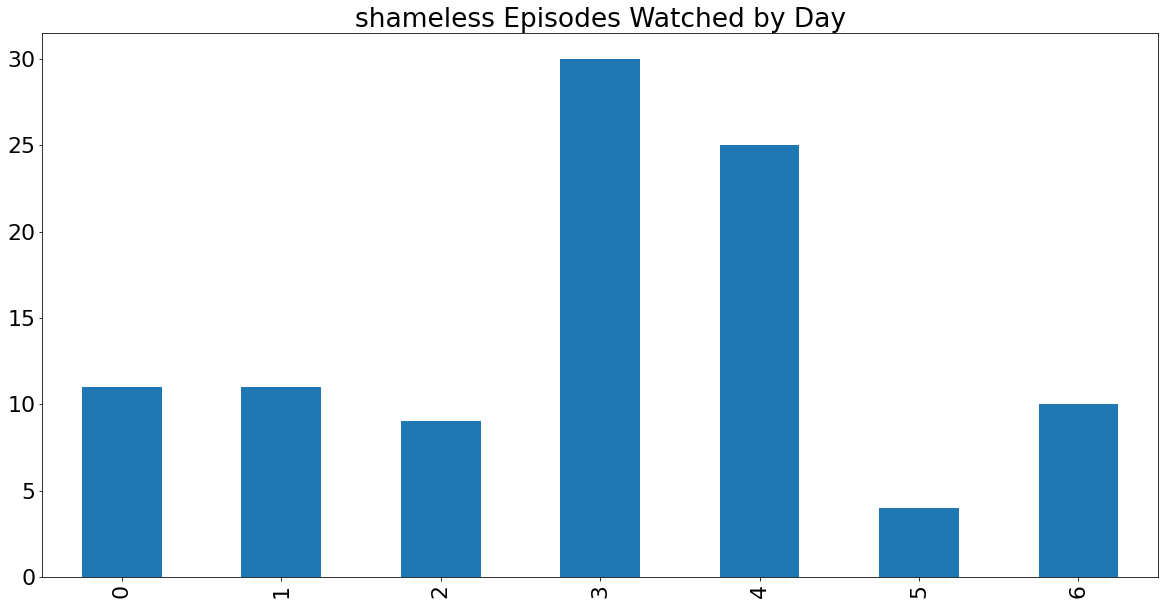

In [13]:
%matplotlib inline
import matplotlib

# set our categorical and define the order so the days are plotted Monday-Sunday
shameless['weekday'] = pd.Categorical(shameless['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create shameless_by_day and count the rows for each weekday, assigning the result to that variable
shameless_by_day = shameless['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
shameless_by_day = shameless_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot shameless_by_day as a bar chart with the listed size and title
shameless_by_day.plot(kind='bar', figsize=(20,10), title='shameless Episodes Watched by Day')

<AxesSubplot:title={'center':'shameless Episodes Watched by Hour'}>

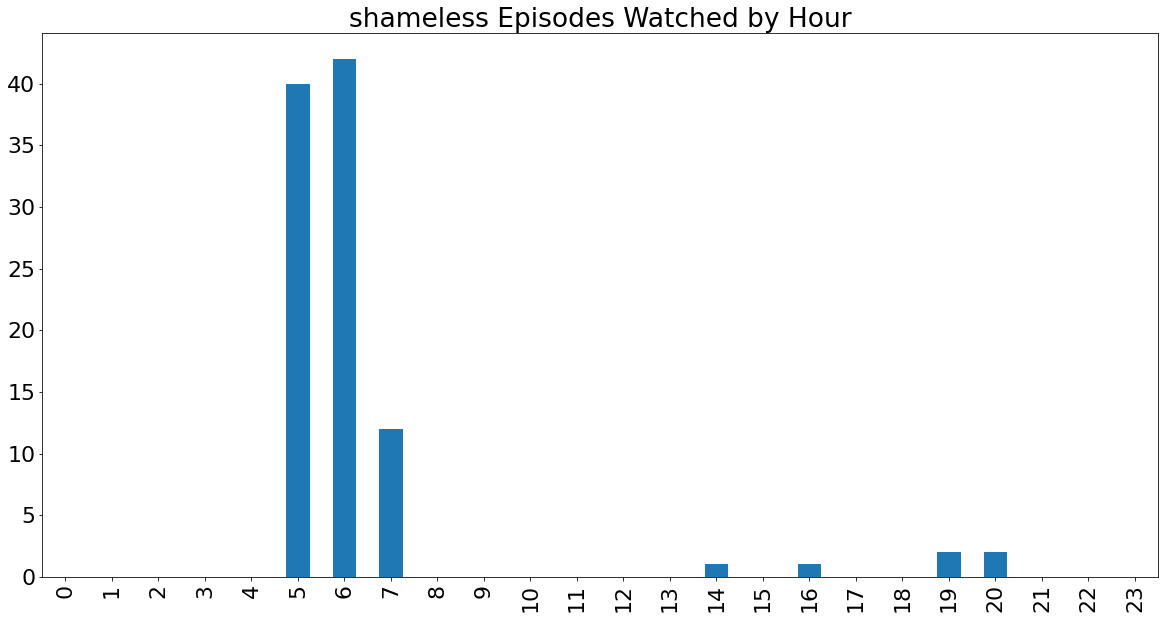

In [14]:
# set our categorical and define the order so the hours are plotted 0-23
shameless['hour'] = pd.Categorical(shameless['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create shameless_by_hour and count the rows for each hour, assigning the result to that variable
shameless_by_hour = shameless['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
shameless_by_hour = shameless_by_hour.sort_index()

# plot shameless_by_hour as a bar chart with the listed size and title
shameless_by_hour.plot(kind='bar', figsize=(20,10), title='shameless Episodes Watched by Hour')